In [1]:
import os
os.chdir(r'D:\D\Edureka\Edureka - 24 June - Python\Class 19 - 20')

In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('airline_passengers.csv')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [6]:
dataset['Month'] = pd.to_datetime(dataset['Month'])

In [8]:
dataset.set_index('Month', inplace=True)

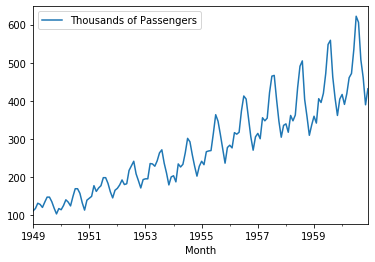

In [11]:
dataset.plot()

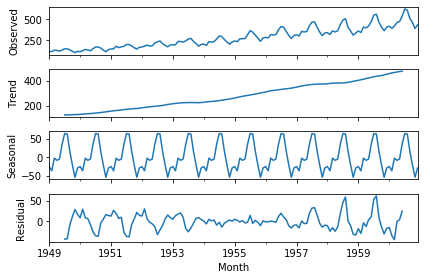

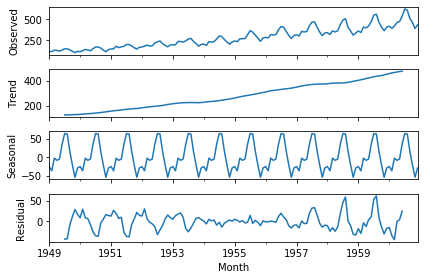

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset['Thousands of Passengers'])
decomposition.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
adfuller(dataset['Thousands of Passengers'])

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [16]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dickey Fuller Test')
    labels =['ADF Test Statistic','P-value','#Lags','No of Obs']
    for value, label in zip(result, labels):
        print(label + ':' + str(value))
    if result[1]<=0.05:
        print('The time series is stationary')
    else:
        print('Time series is not stationary')

In [17]:
adf_check(dataset['Thousands of Passengers'])

Augmented Dickey Fuller Test
ADF Test Statistic:0.8153688792060423
P-value:0.9918802434376409
#Lags:13
No of Obs:130
Time series is not stationary


In [18]:
dataset['Thousands of Passengers 1st Diff'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(1)

In [19]:
dataset

,Thousands of Passengers,Thousands of Passengers 1st Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


In [20]:
adf_check(dataset['Thousands of Passengers 1st Diff'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistic:-2.8292668241699874
P-value:0.05421329028382711
#Lags:12
No of Obs:130
Time series is not stationary


In [21]:
dataset['Thousands of Passengers 2nd Diff'] = dataset['Thousands of Passengers 1st Diff'] - dataset['Thousands of Passengers 1st Diff'].shift(1)

In [22]:
dataset

,Thousands of Passengers,Thousands of Passengers 1st Diff,Thousands of Passengers 2nd Diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
...,...,...,...
1960-08-01,606,-16.0,-103.0
1960-09-01,508,-98.0,-82.0
1960-10-01,461,-47.0,51.0


In [24]:
adf_check(dataset['Thousands of Passengers 2nd Diff'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistic:-16.384231542468513
P-value:2.7328918500142026e-29
#Lags:11
No of Obs:130
The time series is stationary


In [ ]:
AR                      I                           MA
p=0                    d=2                         q=0
P=1                    D=1                         Q=3

In [ ]:
#yt+1 = B1yt + B2Yt-1 + e

In [ ]:
yt+1 = 0.8 * 23 + 0.7* 20 + 0.7

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


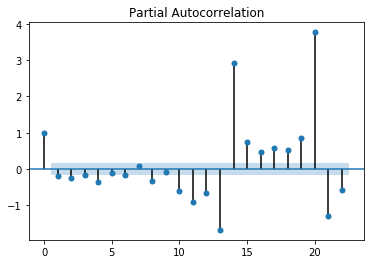

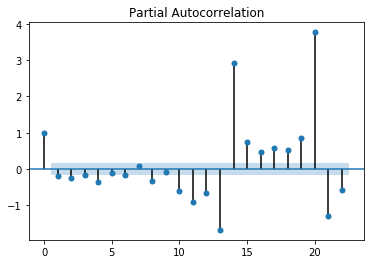

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_pacf(dataset['Thousands of Passengers 2nd Diff'].dropna())
#p=0

In [ ]:
MA
q =0


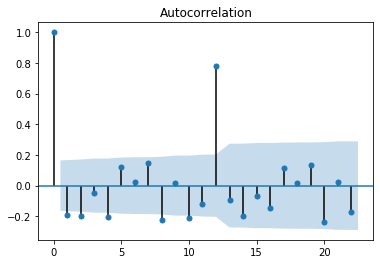

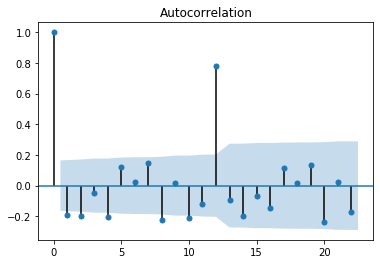

In [26]:
plot_acf(dataset['Thousands of Passengers 2nd Diff'].dropna())

In [27]:
dataset['Seaonal Difference'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(12)

In [29]:
dataset.to_csv('seasonal dif.csv')

In [30]:
adf_check(dataset['Seaonal Difference'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistic:-3.3830207264924805
P-value:0.011551493085514982
#Lags:1
No of Obs:130
The time series is stationary


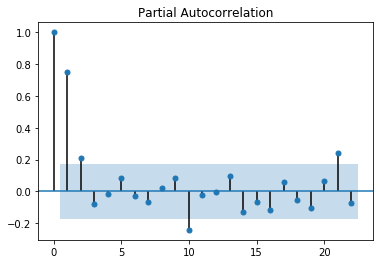

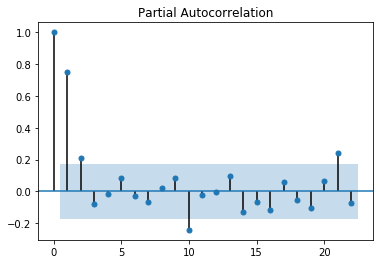

In [31]:
plot_pacf(dataset['Seaonal Difference'].dropna())

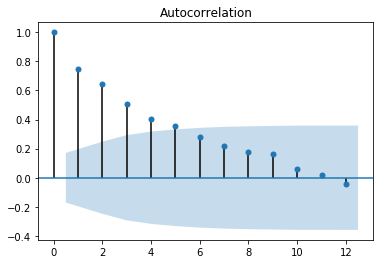

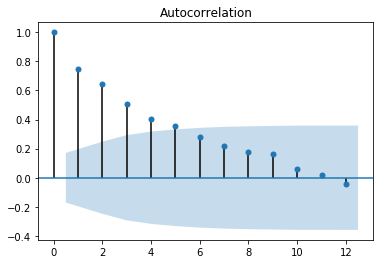

In [33]:
plot_acf(dataset['Seaonal Difference'].dropna(), lags=12)

In [ ]:
AR                      I                           MA
p=0                    d=2                         q=0
P=1                    D=1                         Q=3

In [ ]:
ARIMA(0,2,0)(1,1,3)

In [34]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [43]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'], order=(1,2,2), seasonal_order=(1,2,2,12))
results = model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:            Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(1, 2, 2)x(1, 2, 2, 12)   Log Likelihood                -465.692
Date:                            Sun, 01 Mar 2020   AIC                            945.384
Time:                                    19:08:05   BIC                            964.778
Sample:                                01-01-1949   HQIC                           953.259
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0518      0.307     -0.169      0.866      -0.654       0.550
ma.L1         -1.3917      0.298   

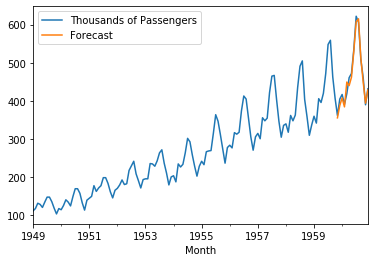

In [44]:
dataset['Forecast'] = results.predict(start=130, end=144, dynamic=True)
dataset[['Thousands of Passengers', 'Forecast']].plot()

In [45]:
dataset


,Thousands of Passengers,Thousands of Passengers 1st Diff,Thousands of Passengers 2nd Diff,Seaonal Difference,Forecast
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0,615.362241
1960-09-01,508,-98.0,-82.0,45.0,511.720514
1960-10-01,461,-47.0,51.0,54.0,449.715686


In [47]:
from pandas.tseries.offsets import DateOffset
future_dates = [dataset.index[-1] + DateOffset(months=x) for x in range(0,24)]

In [48]:
future_dates

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00')]

In [46]:
dataset.index[-1]

Timestamp('1960-12-01 00:00:00')

In [51]:
futute_dates_df = pd.DataFrame(index=future_dates[1:], columns=dataset.columns)

In [53]:
future_df = pd.concat([dataset,futute_dates_df])

In [54]:
future_df

,Thousands of Passengers,Thousands of Passengers 1st Diff,Thousands of Passengers 2nd Diff,Seaonal Difference,Forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1962-07-01,NaN,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN,NaN


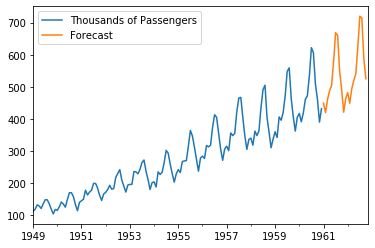

In [55]:
future_df['Forecast'] = results.predict(start=144, end=165, dynamic=True)
future_df[['Thousands of Passengers', 'Forecast']].plot()

In [56]:
future_df

,Thousands of Passengers,Thousands of Passengers 1st Diff,Thousands of Passengers 2nd Diff,Seaonal Difference,Forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1962-07-01,NaN,NaN,NaN,NaN,719.835881
1962-08-01,NaN,NaN,NaN,NaN,714.434624
1962-09-01,NaN,NaN,NaN,NaN,587.598467
1962-10-01,NaN,NaN,NaN,NaN,525.169433
